In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from pathlib import Path

# make sure plots are displayed correctly on notebooks
%pylab inline
%matplotlib inline
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# FFT, Power Spectrum, Energy

Mean of f  -1.4210854715202004e-17


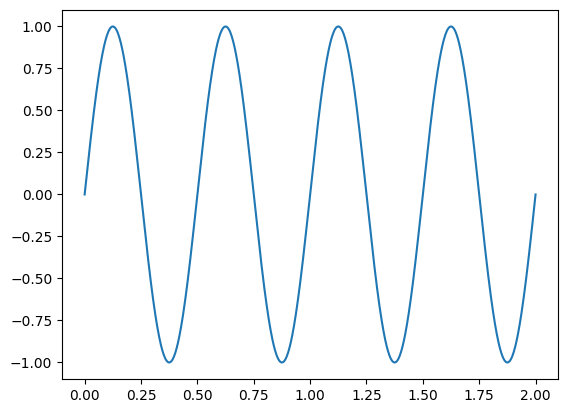

In [11]:
starttime = 0.0
endtime = 2.0
steps = 1000
t = np.linspace(starttime, endtime, num=steps)

theta = [2,4,12] # these are the frequencies
f = np.sin(2*np.pi*theta[0]*t) #+ np.sin(2*np.pi*theta[1]*t) + np.sin(2*np.pi*theta[2]*t)
dc = np.mean(f)
print('Mean of f ', dc)

plt.plot(t, f)

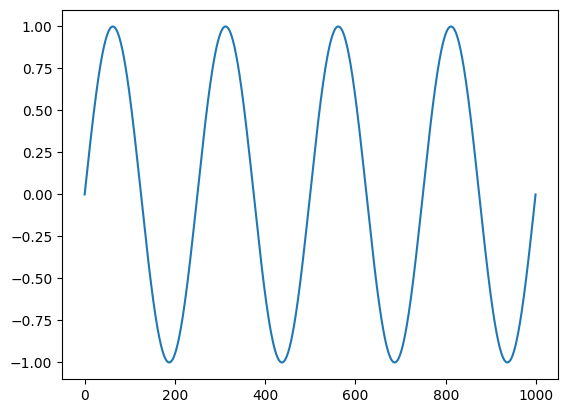

In [12]:
f = f - dc
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

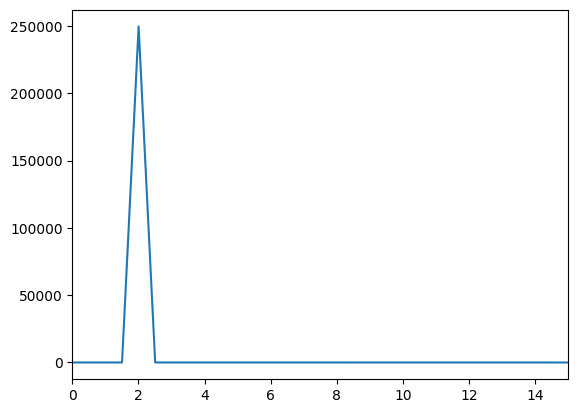

In [13]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [14]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]
for i in range(len(theta)):
    print(theta[i], powspec[2*theta[i]]) 

2 249736.73880337158
4 0.4459767961933231
12 0.02950275086152221


In [15]:
np.sum(powspec) # this is probably what Dambre calls total energy E_tot

249749.9999208767

In [16]:
de_fi = powspec[2*theta[i]]/np.sum(powspec)

In [17]:
de_fi

1.18129132616092e-07

## Test with Linear Reservoir

In [18]:
import sys  
sys.path.insert(1, './../../../../ESN-IP/SOURCES/.')

In [19]:
import torch
from ESN import Reservoir

identity_activation = torch.nn.Identity()

linear_reservoir = Reservoir(1, 1, bias=True, activation=identity_activation)

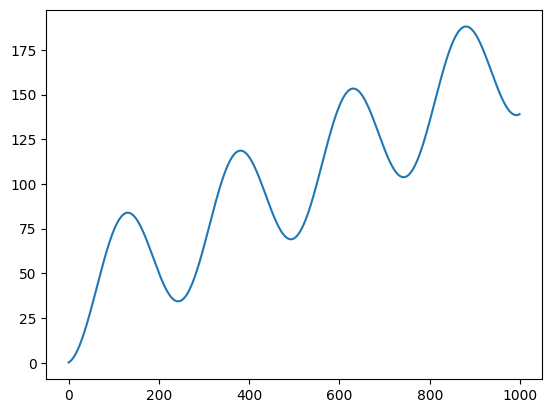

In [20]:
f_res = linear_reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

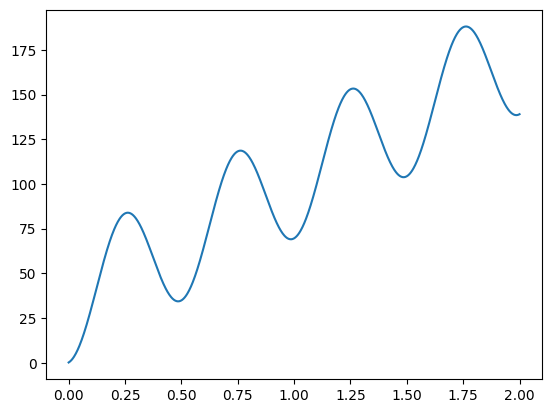

In [21]:
plt.plot(t, f_res)

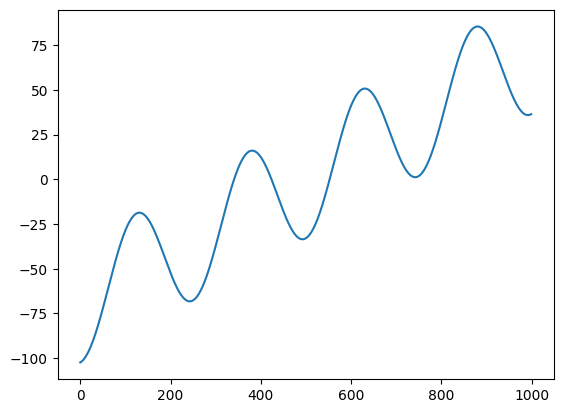

In [22]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

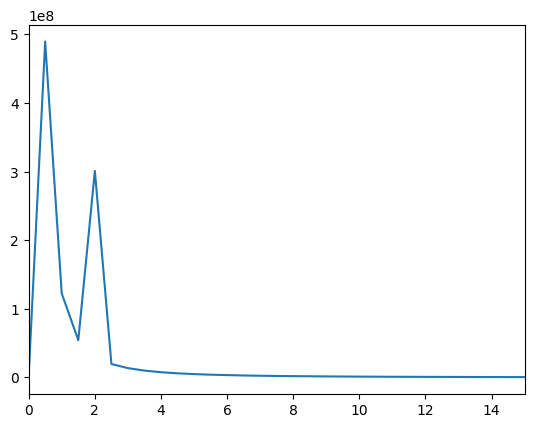

In [23]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [24]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 300988121.2098023


In [25]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [26]:
de_fi

0.7201625932999469

## Test with Nonlinear Reservoir

In [27]:
import sys  
sys.path.insert(1, "./../../../../ESN-IP/SOURCES/.")

In [28]:
import torch
from Reservoir import Reservoir

identity_activation = torch.nn.Identity()

reservoir = Reservoir(1, 1, bias=True)

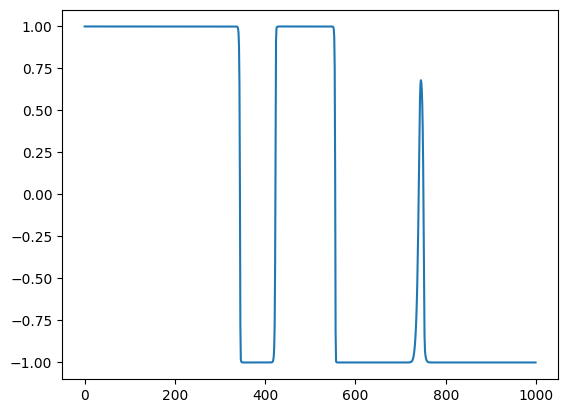

In [29]:
f_res = reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

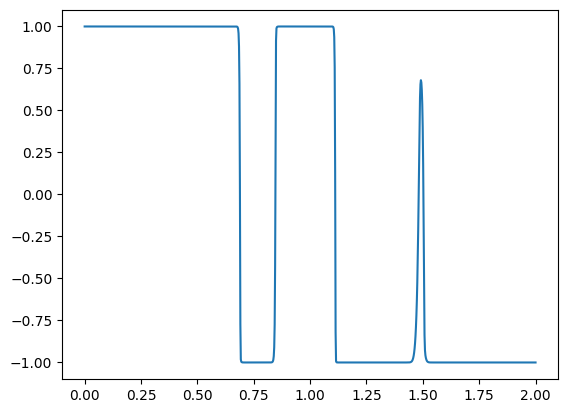

In [30]:
plt.plot(t, f_res)

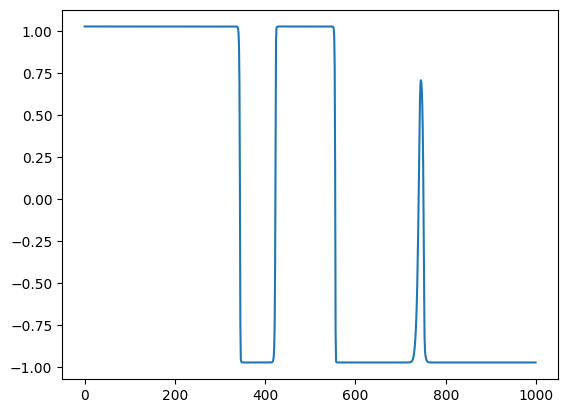

In [31]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

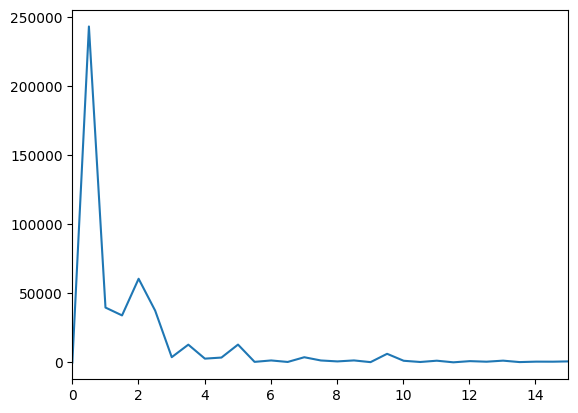

In [32]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [33]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 60547.48267483582


In [34]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [35]:
de_fi

0.876043747529449

## Generalize to more than one unit

In [36]:
def deviation_from_linearity(signal, theta, verbose = True):
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    fhat = np.fft.fft(signal)
    N = len(fhat)
    halvedfhat = fhat[0:int(N/2)]
    powspec = abs(halvedfhat)**2

    fs = steps/(endtime - starttime)

    freq = np.linspace(0,int(fs/2),int(N/2))
    de_phi =  (1 - powspec[2*theta]/np.sum(powspec))

    if verbose: 
        print(f"Frequence:{theta}, Deviation: {de_phi}, Powerspect: {powspec[2*theta]}, Total Energy: {np.sum(powspec)}") 

        plt.plot(freq,powspec)
        plt.xlim([0, 100])

    return de_phi

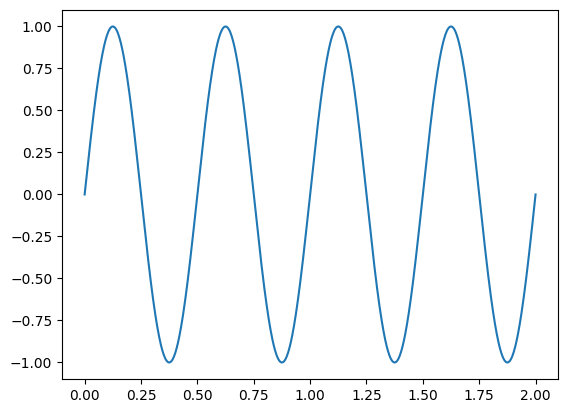

In [37]:
f = np.sin(2*np.pi*theta[0]*t) 
plt.plot(t, f)

In [38]:
reservoir = Reservoir(1, 10, bias=True, ro_rescale=0.9)
linear_reservoir = Reservoir(1, 10, bias=True,  activation=torch.nn.Identity(), ro_rescale=0.9)

In [39]:
f_res = reservoir.predict(f).numpy()
f_rlin = linear_reservoir.predict(f).numpy()

In [40]:
f_res.shape

(1000, 10)

In [41]:
# Subtract the DC component
f_res -= np.mean(f_res, axis=0)
f_rlin -= np.mean(f_rlin, axis=0)

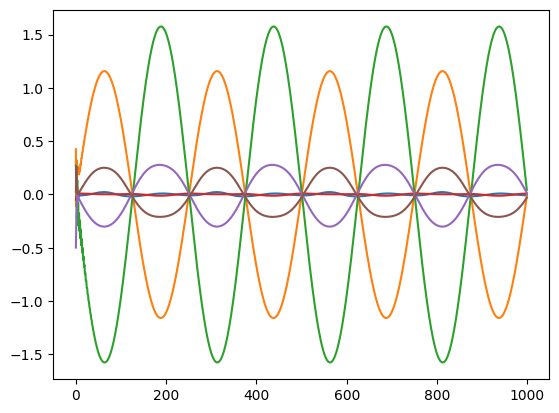

In [42]:
plt.plot(np.arange(len(f_res)), f_res[:,5])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,8])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,1])
plt.plot(np.arange(len(f_res)), f_res[:,3])
plt.plot(np.arange(len(f_rlin)), f_res[:,4])
plt.plot(np.arange(len(f_rlin)), f_res[:,1])

In [43]:
# Average over all neurons
f_res = np.mean(f_res, axis=1)
f_rlin = np.mean(f_rlin, axis=1)

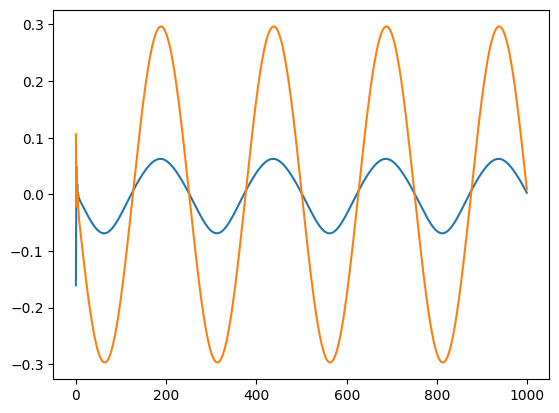

In [44]:
plt.plot(np.arange(len(f_res)), f_res)
plt.plot(np.arange(len(f_rlin)), f_rlin)

Frequence:2, Deviation: 0.0154384175085156, Powerspect: 1033.7297020872797, Total Energy: 1049.9391002758537
0.0154384175085156
Frequence:2, Deviation: 0.00039311326539792635, Powerspect: 21971.613073204768, Total Energy: 21980.253802551364
0.00039311326539792635


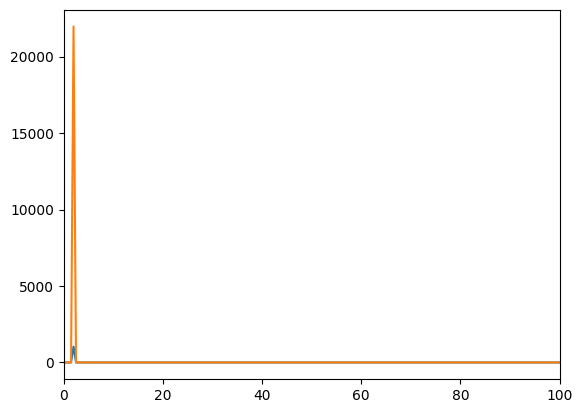

In [45]:
print(deviation_from_linearity(f_res, 2))
print(deviation_from_linearity(f_rlin, 2))

### Last step - Iterate over a range of initial carrier frequency

The range and the rescaling of the carrier frequencies for the various input sinussoids determines the scale of the metric. 

On the other hand, such a scale also depends on the spectral radius of the reservoir. 

In [46]:
theta_range = (np.linspace(0.01, 0.5, 100)*200).astype(int)

In [47]:
theta_range

array([  2,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [48]:
result_table = torch.zeros(2,2)

Frequence:2, Deviation: 0.04992739652583211, Powerspect: 237.0560555429669, Total Energy: 249.51362103918657
Frequence:2, Deviation: 0.04620671686758604, Powerspect: 237.05899935086276, Total Energy: 248.54337259780445
Frequence:3, Deviation: 0.04625834592973599, Powerspect: 236.8063603216748, Total Energy: 248.29193452027712
Frequence:4, Deviation: 0.046317874915644985, Powerspect: 236.44720925564377, Total Energy: 247.93083883660876
Frequence:5, Deviation: 0.04637136406696141, Powerspect: 235.9766497988196, Total Energy: 247.45130432030072
Frequence:6, Deviation: 0.046411827092568525, Powerspect: 235.39071171660743, Total Energy: 246.84734815755493
Frequence:7, Deviation: 0.04643418030592816, Powerspect: 234.68671704135014, Total Energy: 246.1148587694173
Frequence:8, Deviation: 0.04643447535872425, Powerspect: 233.86304301139967, Total Energy: 245.251151565465
Frequence:9, Deviation: 0.046409140360177736, Powerspect: 232.91866191179176, Total Energy: 244.2542937122601
Frequence:10, 

Frequence:29, Deviation: 0.03980038410165454, Powerspect: 188.0239628432866, Total Energy: 195.8175776475132
Frequence:30, Deviation: 0.03955992750876802, Powerspect: 184.4451624812736, Total Energy: 192.04234367569813
Frequence:31, Deviation: 0.03938887069384167, Powerspect: 180.7524438001731, Total Energy: 188.16401172733563
Frequence:32, Deviation: 0.03929061702393788, Powerspect: 176.9550351528201, Total Energy: 184.19205463014538
Frequence:33, Deviation: 0.0392660156736756, Powerspect: 173.06379508598107, Total Energy: 180.1370596953901
Frequence:34, Deviation: 0.03931415437903518, Powerspect: 169.09065320284745, Total Energy: 176.01035132723456
Frequence:35, Deviation: 0.039432919625269625, Powerspect: 165.04826364955673, Total Energy: 171.82377683104562
Frequence:36, Deviation: 0.039619399282974865, Powerspect: 160.94933870927383, Total Energy: 167.58911892754625
Frequence:37, Deviation: 0.039869482221678076, Powerspect: 156.80647284121423, Total Energy: 163.31787182856553
Frequ

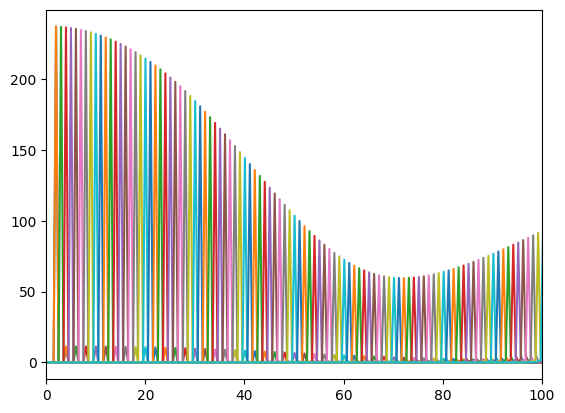

In [49]:
de_acc = 0
reservoir = Reservoir(1, 100, bias=True, ro_rescale=0.9)

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc += deviation_from_linearity(f_res, theta, verbose=True)

de_fi = de_acc/len(theta_range)
result_table[0,0] = de_fi
print(de_fi)



Frequence:2, Deviation: 0.06554194934537005, Powerspect: 249.4706962506963, Total Energy: 266.9683203819913
Frequence:2, Deviation: 0.0616697115487419, Powerspect: 249.491225855896, Total Energy: 265.88849249200797
Frequence:3, Deviation: 0.061876455856690216, Powerspect: 249.37496076684405, Total Energy: 265.82315551473783


Frequence:4, Deviation: 0.062129440375098266, Powerspect: 249.18121956419753, Total Energy: 265.688283960909
Frequence:5, Deviation: 0.06239379184635152, Powerspect: 248.88592458163274, Total Energy: 265.44824726762795
Frequence:6, Deviation: 0.06264598884078942, Powerspect: 248.4681497678486, Total Energy: 265.07397078353785
Frequence:7, Deviation: 0.06286940544371589, Powerspect: 247.91195394953974, Total Energy: 264.54365633737734
Frequence:8, Deviation: 0.06305147669251066, Powerspect: 247.2056147555708, Total Energy: 263.84119149141605
Frequence:9, Deviation: 0.06318127396982176, Powerspect: 246.3399859996394, Total Energy: 262.9537381725052
Frequence:10, Deviation: 0.06324916486367904, Powerspect: 245.30775687061399, Total Energy: 261.870870747519
Frequence:11, Deviation: 0.06324784247391535, Powerspect: 244.1034574340048, Total Energy: 260.5848894745754
Frequence:12, Deviation: 0.06317266757800255, Powerspect: 242.7243526326841, Total Energy: 259.09187769443514
Frequence:13, Dev

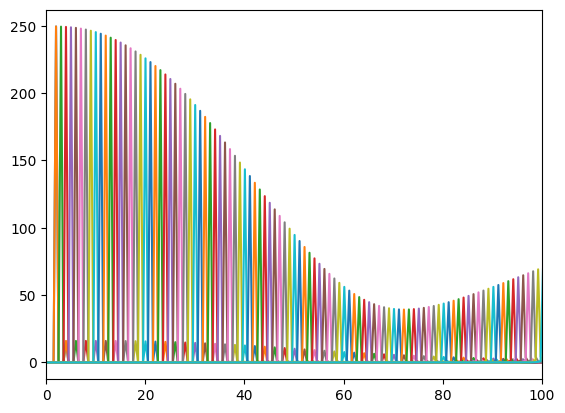

In [50]:
de_acc = []
reservoir.reset_initial_state()
reservoir.rescale_weights(0.99) #activation=torch.nn.Tanh())

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)
    
    de_theta = deviation_from_linearity(f_res, theta, verbose=True)
    de_acc.append(de_theta)


de_fi = sum(de_acc)/len(theta_range)
result_table[1,0] = de_fi
print(de_fi)


Frequence:2, Deviation: 0.018092330177790883, Powerspect: 2580.1028288391335, Total Energy: 2627.6430138347982
Frequence:2, Deviation: 5.457058570412787e-05, Powerspect: 2578.8177697389574, Total Energy: 2578.9585050150827
Frequence:3, Deviation: 0.00041240353133353835, Powerspect: 2606.088036988775, Total Energy: 2607.163240315844
Frequence:4, Deviation: 0.00049582365567169, Powerspect: 2646.519480013956, Total Energy: 2647.832337923351
Frequence:5, Deviation: 0.0005932941705506511, Powerspect: 2695.3222134942935, Total Energy: 2696.9222817624914
Frequence:6, Deviation: 0.0007077599125407952, Powerspect: 2749.902762820484, Total Energy: 2751.8504122275676
Frequence:7, Deviation: 0.0008427472768708366, Powerspect: 2807.266237799884, Total Energy: 2809.634049243888
Frequence:8, Deviation: 0.0010018791533521476, Powerspect: 2864.139151434868, Total Energy: 2867.0115505397735
Frequence:9, Deviation: 0.001188469859515262, Powerspect: 2917.1073215149313, Total Energy: 2920.578340845379
Freq

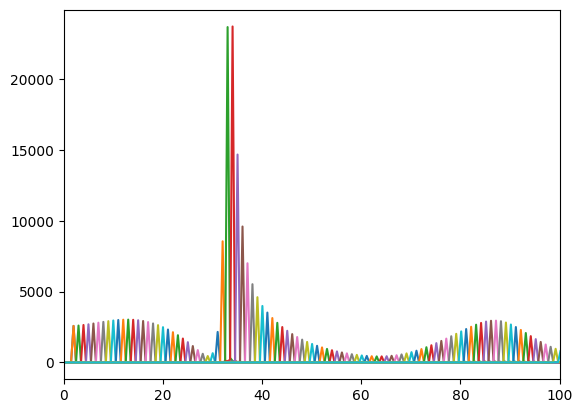

In [51]:
de_acc = [ ]
reservoir.reset_initial_state()
reservoir.activation = torch.nn.Identity()#)
reservoir.rescale_weights(0.99) 


for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc.append(deviation_from_linearity(f_res, theta, verbose=True))

de_fi = sum(de_acc)/len(theta_range)
result_table[1, 1] = de_fi
print(de_fi)


In [52]:
from Metrics import DeltaPhi

Frequence:2, Deviation: 0.018092330177790883,  Powerspect: 2580.1028288391335, Total Energy: 2627.6430138347982
Frequence:2, Deviation: 5.457058570412787e-05,  Powerspect: 2578.8177697389574, Total Energy: 2578.9585050150827
Frequence:3, Deviation: 0.00041240353133353835,  Powerspect: 2606.088036988775, Total Energy: 2607.163240315844
Frequence:4, Deviation: 0.00049582365567169,  Powerspect: 2646.519480013956, Total Energy: 2647.832337923351
Frequence:5, Deviation: 0.0005932941705506511,  Powerspect: 2695.3222134942935, Total Energy: 2696.9222817624914
Frequence:6, Deviation: 0.0007077599125407952,  Powerspect: 2749.902762820484, Total Energy: 2751.8504122275676
Frequence:7, Deviation: 0.0008427472768708366,  Powerspect: 2807.266237799884, Total Energy: 2809.634049243888
Frequence:8, Deviation: 0.0010018791533521476,  Powerspect: 2864.139151434868, Total Energy: 2867.0115505397735
Frequence:9, Deviation: 0.001188469859515262,  Powerspect: 2917.1073215149313, Total Energy: 2920.57834084

0.047473925186907906

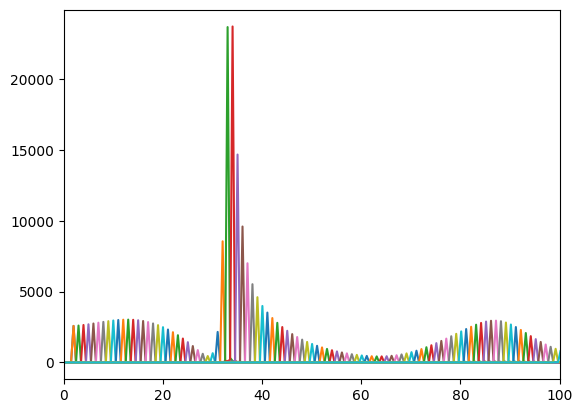

In [53]:
reservoir.reset_initial_state()
DeltaPhi(verbose=True, plot=True, theta_range=theta_range).evaluate(reservoir)

Frequence:2, Deviation: 0.07396782839089844,  Powerspect: 123.82743128669759, Total Energy: 133.71828224016375


Frequence:2, Deviation: 7.281204799403085e-05,  Powerspect: 122.77002869472472, Total Energy: 122.77896848287055
Frequence:3, Deviation: 0.00068439122192121,  Powerspect: 136.98254825178014, Total Energy: 137.07636211074163
Frequence:4, Deviation: 0.0007416624413203454,  Powerspect: 156.7394948924302, Total Energy: 156.85582896947903
Frequence:5, Deviation: 0.0008079734517627557,  Powerspect: 181.23977471213232, Total Energy: 181.38633005132647
Frequence:6, Deviation: 0.0008937430674033076,  Powerspect: 209.82117415915545, Total Energy: 210.00886812913907
Frequence:7, Deviation: 0.0010058195427979921,  Powerspect: 241.7235172389956, Total Energy: 241.96689226794882
Frequence:8, Deviation: 0.001148096305713997,  Powerspect: 276.1159768868154, Total Energy: 276.4333489935711
Frequence:9, Deviation: 0.0013224526932910097,  Powerspect: 312.1259238619244, Total Energy: 312.5392422245634
Frequence:10, Deviation: 0.001529575993162724,  Powerspect: 348.8695301486794, Total Energy: 349.40397007

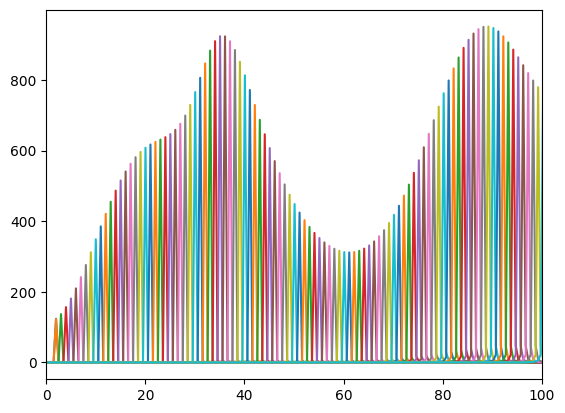

In [54]:
reservoir.reset_initial_state()
reservoir.rescale_weights(0.9)
de_fi = DeltaPhi(verbose=True, plot=True, theta_range=theta_range).evaluate(reservoir)
result_table[0,1] = de_fi
print(de_fi)

## Summing Up 

In [55]:
result_table = result_table.numpy()

## 

In [56]:
print("----------", "|", "-- Tanh --", "|", "-- Linear --" )
print("rho = 0.99", "|", result_table[1, 0], "|", result_table[1, 1] )
print("rho = 0.90",  "|",result_table[0, 0], "|", result_table[0, 1] )


---------- | -- Tanh -- | -- Linear --
rho = 0.99 | 0.08950011 | 0.047473926
rho = 0.90 | 0.07318785 | 0.044624932
